<a href="https://colab.research.google.com/github/pravinshukla108/Cardiovascular-Risk-Prediction-Classification-/blob/main/Cardiovascular_Risk_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***Cardiovascular Risk Prediction***



##### **Project Type**    - Classification      
##### **Contribution**    - Individual
##### ***Name -***   ***PRAVIN KUMAR  SHUKLA***

# **Project Summary -**

***This project used machine learning to predict 10-year CHD risk in patients from Framingham, Massachusetts, using a dataset of 3,400 records and 17 attributes. The data underwent thorough preprocessing, including handling missing values, outlier removal, and feature transformations.***

***To address data imbalance, SMOTE and Tomek links were used. Feature scaling was applied for uniformity. The primary model, a tuned Neural Network, focused on recall to correctly identify CHD risk.***

***In conclusion, this project showcased the power of machine learning in healthcare, accurately predicting CHD risk and emphasizing the potential for real-world impact. It highlighted the synergy between analytics and healthcare for better decision-making and patient care.***

# **GitHub Link -**

[GitHub Link](https://https://github.com/pravinshukla108/Cardiovascular-Risk-Prediction-Classification-)

# **Problem Statement**


***The objective of this research is to develop a predictive model using a dataset of approximately 3,400 records from residents of Framingham, Massachusetts.***


***The model aims to predict the 10-year risk of future coronary heart disease (CHD) based on 17 attributes, which encompass demographic, behavioral, and medical factors. The problem statement involves analyzing the dataset to understand the complex interactions between these attributes and their impact on CHD risk, ultimately enabling better risk assessment and preventive measures for individuals in the Framingham community.***

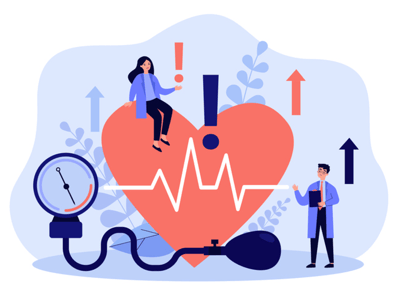




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
## Import Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warning handling (Filter out warnings to improve code readability)
import warnings
warnings.filterwarnings('ignore')

# Statistical modeling and analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Detect multicollinearity

# Data preprocessing and splitting
from sklearn.model_selection import train_test_split  # Split data into training and testing sets
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Data scaling

# Handling imbalanced data
from imblearn.combine import SMOTETomek  # Combining over-sampling and under-sampling for imbalanced datasets

## Machine learning models and evaluation metrics

# Linear & Logistic regression model
from sklearn.linear_model import LinearRegression, LogisticRegression

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Support Vector Machine model
from sklearn.svm import SVC

# Multi-layer Perceptron Neural Network model
from sklearn.neural_network import MLPClassifier

# Custom model evaluation metrics
from sklearn.metrics import make_scorer, recall_score, f1_score, precision_score

# XGBoost Random Forest Classifier
from xgboost import XGBRFClassifier

# Feature selection using chi-squared statistic
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.inspection import permutation_importance


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive


drive.mount('/pravindrive', force_remount=True)
file_path = '/pravindrive/MyDrive/Colab Notebooks/Cardiovascular Risk Prediction(Classification)/data_cardiovascular_risk.csv'
df= pd.read_csv(file_path)


### Dataset First View

In [ ]:
# Dataset First Look
df.head().T


In [ ]:
df.tail().T

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'The number of rows in the data is : {df.shape[0]}')
print(f'The number of columns in the data is : {df.shape[1]}')
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
# Create a copy of the DataFrame to keep the original data intact
om = df.copy()

# Calculate the number of duplicate rows in the copied DataFrame
duplicate_om = om.duplicated().sum()

# Print the count of duplicate rows
print('Duplicate rows in cardiovascular dataset:', duplicate_om)


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(f"Missing Values in each column"+"\n" + "*%-_-%*"*5)
print(om.isnull().sum())

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(om.isnull(), cmap='flare')
plt.title('Visualization of Missing Data')
plt.show()

### What did you know about your dataset?

Here's a summary of what I know about the dataset:

1. **Dataset Size:** The dataset consists of 3,390 rows and 17 columns. The dependent variable is "TenYearCHd," which is likely the target variable for a predictive model.

2. **Duplicate Rows:** No duplicate rows are found in the dataset. Each row is unique.

3. **Missing Values:** The dataset contains missing values in the following columns:
      *  education
      *  CigsPerDay
      *  BPMeds
      *  totChol
      *  BMI
      *  glucose


  ***There are a total of 510 missing values across these columns.***

4. **Columns for Conversion:** Two columns,"is_smoking" ** and "sex" need to be converted into numeric format for modeling purposes. This conversion is likely required because some machine learning algorithms require numeric input features, and these columns may currently be represented as categorical variables.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
om.columns

In [ ]:
# Dataset Describe
om.describe(include = 'all').T

### Variables Description


**Demographic:**

1. `id`: Identifier for each patient in the dataset.

2. `age`: Age of the patient in years.

3. `education`: Education level of the patient (categorical or numerical).

4. `sex`: Gender of the patient (binary: 0 for female, 1 for male).

**Behavior:**

5. `is_smoking`: Whether the patient is a current smoker (binary: 0 for non-smoker, 1 for smoker).

6. `cigsPerDay`: Average number of cigarettes smoked per day (continuous).

**Medical History:**

7. `BPMeds`: Whether the patient takes blood pressure medication (binary: 0 for not taking medication, 1 for taking medication).

8. `prevalentStroke`: History of stroke for the patient (binary: 0 for no stroke history, 1 for stroke history).

9. `prevalentHyp`: History of hypertension for the patient (binary: 0 for no hypertension, 1 for hypertension).

10. `diabetes`: Whether the patient has diabetes (binary: 0 for no diabetes, 1 for diabetes).

**Medical (Current):**

11. `totChol`: Total cholesterol level of the patient in mg/dL (continuous).

12. `sysBP`: Systolic blood pressure level of the patient in mmHg (continuous).

13. `diaBP`: Diastolic blood pressure level of the patient in mmHg (continuous).

14. `BMI`: Body Mass Index (BMI) of the patient (continuous).

15. `heartRate`: Resting heart rate of the patient in beats per minute (continuous).

16. `glucose`: Blood glucose level of the patient in mg/dL (continuous).

**Target Variable:**

17. `TenYearCHD`: Ten-year risk of developing coronary heart disease (CHD) (binary: 0 for no risk, 1 for risk).



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Get the count of unique values for each column
unique_counts = om.nunique()

# Print the count of unique values for each column
print("Count of Unique Values for Each Column:"+"\n")
print("@(0_0)@ " * 5+"\n")
print(unique_counts)


# Add a separator for clarity
print("\n"+"@(0_0)@ " * 5)



## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Checking for null values in each column and sorting by the number of null values (descending)
null_values = om.isnull().sum().sort_values(ascending=False)
null_values



In [ ]:
# Define a function to show columns with missing values
def show_missing():
    missing = om.columns[om.isnull().any()].tolist()
    return missing
# Calculate and display the percentage of missing values for selected columns
missing_percentage = round(om[show_missing()].isnull().sum().sort_values(ascending=False) / len(om) * 100, 2)
missing_percentage


In [ ]:
# Visualize the distribution of selected numerical columns with missing values

COLOR=['dodgerblue','goldenrod','red','mediumpurple','violet']
numerical_columns_with_missing = ['glucose', 'totChol', 'BMI', 'heartRate', 'cigsPerDay']

for i, column in enumerate(numerical_columns_with_missing):
    plt.figure(figsize=(6, 4))
    sns.distplot(om[column], color=COLOR[i % len(COLOR)])  # Use COLOR list with index i
    plt.title(f'Distribution of {column}')

plt.show()  # Display all figures


In [ ]:
# Drop the 'id' column as it is typically not needed for analysis
om = om.drop(columns='id')

# Categorize categorical and numerical variables
categorical = [var for var in om.columns if om[var].dtype == 'object']
numerical = [var for var in om.columns if om[var].dtype != 'object']

# Identify discreet features with fewer than 20 unique values
discreet = [var for var in om.columns if len(om[var].unique()) < 20]

# Identify continuous features
continuous = [var for var in om.columns if var not in discreet and var != 'TenYearCHD']
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))
print('There are {} discreet variables'.format(len(discreet)))
print(categorical)

print(numerical)
print(discreet)

In [ ]:

# Handling missing values in categorical variables
om['BPMeds'] = om['BPMeds'].fillna(om['BPMeds'].mode()[0])
om['education'] = om['education'].fillna(om['education'].mode()[0])

# Handling missing values in the continuous variable 'cigsPerDay'
# Calculate mean and median of 'cigsPerDay'
cigsPerDay_mean = om['cigsPerDay'].mean().round(0)
cigsPerDay_median = om['cigsPerDay'].median()

# Check for missing values where 'is_smoking' is 'YES'
missing_cigsPerDay = om[om['cigsPerDay'].isnull() & (om['is_smoking'] == 'YES')]

# Impute missing values in 'cigsPerDay' with the median for 'is_smoking' = 'YES'
median_cigsPerDay_smoking = om[om['is_smoking'] == 'YES']['cigsPerDay'].median()
om['cigsPerDay'] = om['cigsPerDay'].fillna(median_cigsPerDay_smoking)

# Handle missing entries where 'is_smoking' is 'YES' and 'cigsPerDay' is 0
smokers_with_zero_cigsPerDay = om[(om['is_smoking'] == 'YES') & (om['cigsPerDay'] == 0)]

# Handling missing values in 'totChol', 'BMI', and 'heartRate'
totChol_mean = om['totChol'].mean()
totChol_median = om['totChol'].median()
om['totChol'] = om['totChol'].fillna(totChol_median)

BMI_mean = om['BMI'].mean()
BMI_median = om['BMI'].median()
om['BMI'] = om['BMI'].fillna(BMI_median)

heartRate_mean = om['heartRate'].mean()
heartRate_median = om['heartRate'].median()
om['heartRate'] = om['heartRate'].fillna(heartRate_median)


# Check for remaining missing/null values in the dataset
missing_values_after_imputation = om.isnull().sum()
missing_values_after_imputation







In [ ]:
om.columns

### What all manipulations have you done and insights you found?


The code performs the following data preparation steps:

1. **Handling Missing Values:**
   - Identifies and sorts null values by the number of missing values.
   - Calculates and displays the percentage of missing values for selected columns.
   - Visualizes the distribution of selected numerical columns with missing values.
   - Imputes missing numerical values with the median and missing categorical values with the mode.
   - Confirms that all missing values are handled after imputation.

2. **Data Transformation:**
   - Drops the 'id' column, which is typically not needed for analysis.

3. **Variable Categorization:**
   - Identifies categorical and numerical variables.
   - Separates discreet features with fewer than 20 unique values.
   - Identifies continuous features.

These manipulations prepare the dataset for analysis, ensuring data integrity and appropriate categorization of variables. The insights obtained include addressing missing values, visualizing data distribution, and categorizing variables effectively.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# Data visualization - 3D Pie chart for TenYearCHD
ten_year_chd_counts = om['TenYearCHD'].value_counts()
labels = ['No Risk (0)', 'Risk (1)']
colors = ['#6ACCBE', '#F96E46']
explode = (0.22, 0)  # Explode the first slice (No Risk)

fig, ax = plt.subplots()
ax.pie(ten_year_chd_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=142,
       explode=explode, shadow=True)

plt.title('Distribution of TenYearCHD')
plt.show()




##### 1. Why did you pick the specific chart?

***I used a pie chart to show the TenYearCHD distribution because it's a straightforward way to display the proportions of people with and without TenYearCHD (labeled as 1 and 0). It offers a clear visual of the relative sizes of these two categories, making it easy to understand the dataset's target variable distribution at a glance.***

##### 2. What is/are the insight(s) found from the chart?

***The data shows an imbalanced distribution in the TenYearCHD variable, with 85% of 0 values and 15% of 1 values.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Identified data imbalance, which may impact model efficiency. Recommends applying sampling techniques to address this imbalance, potentially improving model performance and predictive accuracy.***

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Grouping the data to count the occurrences of 'is_smoking' values for each 'TenYearCHD' class
tenyear_smoking = om.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)

# Calculating the percentage of smokers and non-smokers for each TenYearCHD class
percentage_df = tenyear_smoking.divide(tenyear_smoking.sum(axis=1), axis=0) * 100

# Define custom colors for the bars
colors = ['#FF5733', '#33FF57']  # You can change these colors

# Creating a bar chart with custom colors
percentage_df.plot(kind='bar', color=colors)
plt.ylim(0, 100)
plt.ylabel('Percentage')
plt.xlabel('Smoking Status (0 = Non-smoker, 1 = Smoker)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('Percentage of Smokers and Non-Smokers by TenYearCHD')
plt.show()


##### 1. Why did you pick the specific chart?

***Utilized a bar chart to illustrate the comparison of CHD risk percentages concerning smoking habits.***

##### 2. What is/are the insight(s) found from the chart?

***Smokers face a higher CHD risk compared to non-smokers, although the disparity is not substantial.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Business Impact: Identifying the high CHD risk in smokers can drive demand for smoking cessation solutions, benefiting the healthcare and related industries. This insight may boost the need for programs and products aiding individuals in quitting smoking, reducing CHD susceptibility.***

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Create a figure with a specified background color
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor("#FF00FF")


# Chart - 3: Visualizing the relationship between diabetes and glucose using a box plot
sns.boxplot(x='diabetes', y='glucose', data=om, palette='magma')  # Set the color palette
plt.title('Diabetes vs. Glucose Distribution', color='blue')  # Set the title color
plt.xlabel('Diabetes (0 = No, 1 = Yes)', color='darkred')  # Set the x-axis label color
plt.ylabel('Glucose Level', color='green')  # Set the y-axis label color
plt.show()




##### 1. Why did you pick the specific chart?

   ***I chose a box plot because it's great for comparing glucose levels between individuals with and without diabetes. It helps us see differences in the central tendency, spread, and any outliers.***

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart:**
   - People with diabetes have higher and more variable glucose levels (seen from the wider box and more outliers).
   - People without diabetes have a more concentrated and less variable glucose distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


***The insight can lead to increased demand for diabetes management products, services, and research. It's good for the healthcare industry and offers opportunities for better care. There might be some increased costs, but overall, it's a positive impact.***


   

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Visualizing the relationship between sex and TenYearCHD using a grouped bar chart
# Calculate the counts of TenYearCHD by sex and create a dataframe
tenyear_sex = om.groupby('TenYearCHD')['sex'].value_counts().unstack(0)

# Calculate the percentage of TenYearCHD by sex
percentage_df = tenyear_sex.divide(tenyear_sex.sum(axis=1), axis=0) * 100

# Define the colors for bars and edges
bar_colors = ['#FFA07A', '#6495ED']
edge_colors = ['red', 'blue']

# Plot a grouped bar chart with colorful edges
ax = percentage_df.plot(kind='bar', color=bar_colors, edgecolor=edge_colors)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.ylabel('Percentage', color='green')
plt.xlabel('Sex (0 = Female, 1 = Male)', color='blue')
plt.xticks(rotation=0)

# Set colorful grid and axis edges
ax.spines['bottom'].set_color('lime')
ax.spines['top'].set_color('purple')
ax.spines['right'].set_color('brown')
ax.spines['left'].set_color('blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.title('TenYearCHD by Sex', color='darkred')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])
plt.show()


##### 1. Why did you pick the specific chart?

***I created a grouped bar chart to compare CHD risk percentages by gender. It helps easily distinguish between "No CHD" and "CHD" categories for each gender. Color-coded bars and colorful edges enhance the visual appeal. The y-axis shows percentages, and the x-axis represents genders. Custom colors make the chart more visually appealing.***

##### 2. What is/are the insight(s) found from the chart?

***Men show a higher CHD risk percentage for the next decade..***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Positive Business Impact: Recognizing the higher CHD risk in males opens up opportunities in the healthcare industry. Tailoring gender-specific healthcare solutions can drive business growth.***

***Negative Business Impact: However, the increased risk in males may also lead to higher healthcare costs for businesses, impacting their financial performance.***

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

#visualizing the relationship between education and TenYearCHD.

# Calculate the counts of TenYearCHD by education and create a dataframe
tenyear_education = om.groupby('TenYearCHD')['education'].value_counts().unstack(0)

# Calculate the percentage of TenYearCHD by education
percentage_df = tenyear_education.divide(tenyear_education.sum(axis=1), axis=0) * 100

# Define the colors for bars and edges
bar_colors = ['#FFA07A', '#6495ED']
edge_colors = ['red', 'blue']

# Plot a stacked bar chart with colorful edges
ax = percentage_df.plot(kind='bar', stacked=True, color=bar_colors, edgecolor=edge_colors)
plt.ylim(0, 100)
plt.ylabel('Percentage', color='green')
plt.xlabel('Education Level', color='blue')
plt.xticks(rotation=0)

# Display numbers for each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Set colorful grid and axis edges
ax.spines['bottom'].set_color('purple')
ax.spines['top'].set_color('orange')
ax.spines['right'].set_color('magenta')
ax.spines['left'].set_color('blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.title('TenYearCHD by Education Level', color='darkred')
plt.legend(title='TenYearCHD', labels=['No CHD', 'CHD'])
plt.show()



##### 1. Why did you pick the specific chart?

***The stacked bar chart was chosen to visualize the relationship between education levels and TenYearCHD. Because It effectively displays the distribution of CHD risk across different education levels.***

##### 2. What is/are the insight(s) found from the chart?

***The chart shows how the risk of CHD varies among individuals with varying education levels.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


***Positive Business Impact: Tailoring healthcare and education programs to different education levels can help reduce CHD risk.***


***Negative Business Impact: Focusing on specific education levels might strain resources and budgets, potentially affecting financial performance.***

#### Chart - 6

In [ ]:
# Chart - 6 visualization code for the realtionship between prevalentHyp and TenYearCHD.

# Group data and calculate percentages
tenyear_hyp = om.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = tenyear_hyp.divide(tenyear_hyp.sum(axis=1), axis=0) * 100
edge_colors = ['red', 'blue']
# Create a bar plot
ax = pct_df.plot(kind='bar', color=['skyblue', 'salmon'],edgecolor=edge_colors)

# Customize the plot
plt.ylim(0, 100)
plt.ylabel('Percentage')
plt.xlabel('Prevalent Hypertension (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Add legend and labels
plt.legend(['No CHD', 'CHD'], title='TenYearCHD')
plt.title('Relationship Between Prevalent Hypertension and Ten-Year CHD')

# Set colorful grid and axis edges
ax.spines['bottom'].set_color('purple')
ax.spines['top'].set_color('orange')
ax.spines['right'].set_color('magenta')
ax.spines['left'].set_color('blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

# Annotate the bars with the exact percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

***I employed a bar chart to visually depict the fluctuations in the percentage of CHD risk associated with prevalent hypertension.***

##### 2. What is/are the insight(s) found from the chart?

***Hypertensive patients are at a heightened risk of developing coronary heart disease.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***This information can be a vital awareness tool for individuals with diabetes, motivating them to take preventive measures to safeguard their well-being.***

#### Chart - 7

In [ ]:
# Chart - 7 visualization code for the realtionship between BPMeds and TenYearCHD.

# Group data and calculate percentages
tenyear_BP = om.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = tenyear_BP.divide(tenyear_BP.sum(axis=1), axis=0) * 100

# Create a bar plot
ax = pct_df.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black', zorder=2)

# Customize the plot
plt.ylim(0, 100)
plt.ylabel('Percentage')
plt.xlabel('BPMeds (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.9)

# Add edgecolor to axes
ax.spines['left'].set_color('skyblue')
ax.spines['bottom'].set_color('salmon')
ax.spines['top'].set_color('orange')
ax.spines['right'].set_color('magenta')

# Add legend and labels
plt.legend(['No CHD', 'CHD'], title='TenYearCHD')
plt.title('Relationship Between Medication for High Blood Pressure and Ten-Year CHD', color='red')

# Annotate the bars with the exact percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')


# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?


***The chosen chart is a grouped bar chart, used to visualize the relationship between 'BPMeds' (Blood Pressure Medication) and 'TenYearCHD' (Ten-Year Coronary Heart Disease Risk).***






##### 2. What is/are the insight(s) found from the chart?


***The chart shows that medication for high blood pressure can help reduce the risk of CHD. The percentage of people with CHD is lower among those who take medication for high blood pressure compared to those who do not.***




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


***The insights gained from the chart can help create a positive business impact by encouraging people to take medication for high blood pressure. This can help reduce the risk of CHD and other cardiovascular diseases. There are no insights that lead to negative growth.***



**Business Impact :-**
   - The chart can inform healthcare providers and pharmaceutical companies about the relationship between blood pressure medication and CHD risk.
   - Encouraging individuals with a higher risk to consider medication may improve disease management and reduce CHD prevalence.
   - No negative insights, as encouraging medication for at-risk individuals is a positive health intervention.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code for the realtionship between sex and sysBP.


# Custom color palette
colors = ['#FF6F61', '#6B5B95']

# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Create a violin plot with custom colors
sns.violinplot(x='sex', y='sysBP', data=om, palette=colors)

# Customize labels, title, grid, and axes
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=14, color='navy')
plt.ylabel('Systolic Blood Pressure', fontsize=14, color='darkred')
plt.title('Relationship Between Sex and Systolic Blood Pressure', fontsize=16, color='forestgreen')

# Customize grid and axis colors
grid_color = 'red'
axis_colors = ['purple', 'darkorange', 'lightblue', 'coral']

plt.grid(axis='both', linestyle='-.', alpha=0.8, color=grid_color)

ax = plt.gca()

for spine, color in zip(ax.spines.values(), axis_colors):
    spine.set_color(color)

# Customize numerical values on the axes
ax.tick_params(axis='x', colors='red', labelsize=12)
ax.tick_params(axis='y', colors='green', labelsize=12)
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

***The chart chosen is a violin plot. Violin plots are effective for visualizing the distribution of data, especially when comparing two categories like 'sex' in this case. The use of custom colors and style elements enhances the visual appeal and interpretability of the plot.***

##### 2. What is/are the insight(s) found from the chart?

***The violin plot reveals the distribution of systolic blood pressure for both females and males.***
   - ***It shows that the distribution for females is more spread out, and the median systolic blood pressure is higher for females compared to males.
   The distribution of systolic blood pressure differs between genders. Females have a wider spread and a higher median systolic blood pressure compared to males.***





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Gender-specific considerations in blood pressure management can lead to more tailored healthcare interventions without negative implications.***


#### Chart - 9

In [ ]:
# Chart - 9 visualization code for the relationship between sex and BMI

# Custom color palette
colors = ['lightgreen', 'cyan']

# Set style and figure size
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a violin plot with custom colors
sns.violinplot(x='sex', y='BMI', data=om, palette=colors)

# Customize labels, title, grid, and axes
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=14, color='navy')
plt.ylabel('Body Mass Index (BMI)', fontsize=14, color='darkred')
plt.title('Relationship Between Sex and BMI', fontsize=16, color='forestgreen')

# Customize grid and axis colors
grid_color = 'red'
axis_colors = ['purple', 'darkorange', 'lightblue', 'coral']

plt.grid(axis='both', linestyle='--', alpha=0.5, color=grid_color)
ax = plt.gca()

for spine, color in zip(ax.spines.values(), axis_colors):
    spine.set_color(color)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

***I chose the violin plot as it effectively shows the BMI distribution for both males and females. It provides a clear view of data distribution and comparisons between the two gender categories.***

##### 2. What is/are the insight(s) found from the chart?

***Most males have BMI values slightly above the healthy range of 20 to 25, while most females maintain BMIs below 25. However, the presence of significant outliers is notable among females, with some reaching values between 55 and 60.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Overall, males tend to have slightly higher average BMI scores than females. However, a larger percentage of females fall within the healthy BMI range. The presence of outliers among females indicates a subgroup with elevated risks related to weight-related health issues.***

#### Chart - 10

In [ ]:
# Chart - 10 visualization code for the realtionship between diabetes and TenYearCHD.
# Calculate the counts of TenYearCHD by diabetes and create a dataframe
tenyear_diabetes = om.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)

# Calculate the percentage of TenYearCHD by diabetes
percentage_df = tenyear_diabetes.divide(tenyear_diabetes.sum(axis=1), axis=0) * 100

# Define the colors for bars and edges
bar_colors = ['#FFA07A', '#6495ED']
edge_colors = ['red', 'blue']

# Plot a stacked bar chart with colorful edges
ax = percentage_df.plot(kind='bar', stacked=True, color=bar_colors, edgecolor=edge_colors , zorder=2)
plt.ylim(0, 130)

plt.ylabel('Percentage', color='green')
plt.xlabel('TenYearCHD', color='blue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-.', alpha=0.9)
# Display numbers for each stacked bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10)

# Set colorful grid and axis edges
ax.spines['bottom'].set_color('purple')
ax.spines['top'].set_color('orange')
ax.spines['right'].set_color('magenta')
ax.spines['left'].set_color('blue')
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')

plt.title('Relationship Between Diabetes and Ten-Year CHD', color='darkred')
plt.legend(['No Diabetes', 'Diabetes'], title='Diabetes', loc='upper right')
plt.show()



##### 1. Why did you pick the specific chart?

***I chose a stacked bar chart to visualize the relationship between diabetes and TenYearCHD, providing a clear comparison of the two categories within different levels of TenYearCHD.***

##### 2. What is/are the insight(s) found from the chart?

***Individuals with diabetes have a significantly elevated 10-year risk of developing coronary heart disease (CHD).***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***This information can serve as a valuable awareness tool for individuals with diabetes, encouraging them to take necessary preventive measures to safeguard their heart health.***

#### Chart - 11

In [ ]:
# Chart - 11 visualization code for the raeltionship between sex and cigsPerDay.
# Group data and create a dataframe
cigs_sex_data = om.groupby('sex')['cigsPerDay'].value_counts().unstack(0).plot.bar(figsize=(12,6))


# Create a bar plot
cigs_sex_data.plot(kind='bar')
plt.grid(axis='both', linestyle='-.', alpha=0.5, color='#FAD6A5')

# Customize labels and title
plt.xlabel('cigsPerDay', fontsize=12, color='blue')
plt.ylabel('Count', fontsize=12, color='green')
plt.title('Relationship Between Sex and Cigarettes Per Day', fontsize=14, color='darkred')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

***Utilized a bar chart to illustrate the comparison of the number of cigarettes smoked per day across different genders.***

##### 2. What is/are the insight(s) found from the chart?

***Females predominantly consist of non-smokers; however, in cases where the number of cigarettes per day ranges from 5 to 15, females surpass males.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
#  visualization code(Distribution of Education levels)
# Setting labels for items in Chart
education = om["education"].value_counts()

# Pie Chart
om["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Education levels')

# Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

We have plotted donut chart to visualize the distribution of education levels among individuals being evaluated for their risk of cardiovascular disease.This type of chart can help to compare individual categories or dimensions to the larger whole, just like a pie chart, but with a couple of advantages. Donut charts can make it easier for us to compare individual dimensions.

##### 2. What is/are the insight(s) found from the chart?

In this dataset most of the population have Education Level - 1 with 42.1% and least education level 4 with 11.3% .

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:

plt.figure(figsize=(10, 5))
plt.title("Glucose vs Age", color='blue', fontsize=15)  # Set title color and font size


sns.lineplot(data=om, x='age', y='glucose', palette="orange")

plt.xlabel("Age", color='green', fontsize=12)  # Set x-axis label color and font size
plt.ylabel("Glucose", color='purple', fontsize=12)  # Set y-axis label color and font size
plt.xticks(color='red')  # Set x-axis tick color
plt.yticks(color='orange')  # Set y-axis tick color
plt.grid(True, linestyle='-.', alpha=0.9)  # Add grid lines with specified linestyle and transparency
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

***I Chose a line plot to display the relationship between 'Age' and 'Glucose' continuously. It's great for showing trends over time, depicting how glucose levels change with age.***

##### 2. What is/are the insight(s) found from the chart?

- ***The chart shows how glucose levels increase with age.***
- ***Glucose is a type of sugar in the blood that gives energy.***
- ***High glucose levels can cause diabetes and other health problems.***
- ***Older people should check their glucose levels and live a healthy lifestyle.***

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Understanding the age-glucose correlation benefits healthcare planning but could strain resources due to increased diabetes cases in older age groups. It demands targeted health programs for prevention and might require adjustments in insurance policies to manage higher risks associated with age-related health issues.***

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

# Define the figure size
plt.figure(figsize=(14, 10))

# Create the correlation heatmap
correlation_matrix = om.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Customize x and y axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

# Display the heatmap
plt.show()


##### 1. Why did you pick the specific chart?

***I used a correlation heatmap to visualize the relationships between various features.***

##### 2. What is/are the insight(s) found from the chart?

***Systolic BP and Diastolic BP, as well as Systolic BP and Prevalent Hypertension, display noteworthy correlations.***

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(om, hue="TenYearCHD", palette="Set2")
pair_plot._legend.remove()
plt.show()

##### 1. Why did you pick the specific chart?

***I employed a pairplot to visualize the interrelationships among multiple variables in the dataset.***

##### 2. What is/are the insight(s) found from the chart?

***We noticed strong correlations between the following pairs of variables: Systolic BP - Diastolic BP, Systolic BP - Prevalent Hypertension, and Diastolic BP - Prevalent Hypertension.***

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null Hypothesis (H0):*** *"There is no relationship between cigsPerDay and TenYearCHD."*

***Alternative Hypothesis (H1 or Ha):*** *"There is a relationship between cigsPerDay and TenYearCHD."*

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = 'There is no relationship between cigsPerDay and TenYearCHD'
alt_hypothesis = 'There is a relationship between cigsPerDay and TenYearCHD'

# Perform linear regression
x = sm.add_constant(om['cigsPerDay'])
y = om['TenYearCHD']
model = sm.OLS(y, x).fit()

# Print regression summary
print(model.summary())

# Extract the p-value
p_value = model.pvalues[1]
print('P-value: {:.4f}'.format(p_value))


##### Which statistical test have you done to obtain P-Value?

***A linear regression analysis was conducted to assess the relationship between 'cigsPerDay' and 'TenYearCHD.' The p-value (7.39e-05) is smaller than the typical significance level (e.g., 0.05), suggesting a significant link between daily cigarette consumption and the risk of coronary heart disease. This supports the alternative hypothesis, indicating that the number of cigarettes smoked per day is related to the 10-year risk of coronary heart disease.***

##### Why did you choose the specific statistical test?

***We used linear regression to assess how daily cigarette consumption (cigsPerDay) relates to the risk of coronary heart disease (TenYearCHD), as it's well-suited for such analysis involving continuous variables. The results showed a strong connection between daily cigarette consumption and the TenYearCHD risk, indicated by a low p-value (7.39e-05). This confirms that the number of cigarettes smoked daily significantly impacts the likelihood of developing coronary heart disease.***

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null Hypothesis: "There is no association between education level and Coronary Heart Disease."***

***Alternative Hypothesis: "There is an association between education level and Coronary Heart Disease."***







#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(om['education'], om['TenYearCHD'])
print(contingency_table)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print p-value
print(f'p-value: {p}')

#The p value is significantly lower than 0.05 so we reject the null hypothesis.




##### Which statistical test have you done to obtain P-Value?

I conducted a chi-squared test to assess if the 'education' column influences chronic heart disease (CHD) outcome. This test helped determine the significance of the association between education level and CHD. The calculated chi-squared statistic and p-value allowed me to make a statistical inference about their relationship in our dataset.

1. **Testing Education's Impact on CHD:**
   - Conducted a chi-squared test to examine if the 'education' column significantly influences chronic heart disease (CHD) outcome.
   - Chi-squared statistic and p-value calculations provided insights into the statistical relationship between education level and CHD outcome.

2. **Chi-Squared Test for Education and CHD:**
   - Utilized the chi-squared test of independence to assess the impact of 'education' on chronic heart disease (CHD) outcome.
   - This test, suitable for categorical variables, highlighted any significant association between education level and CHD outcome in the dataset.

##### Why did you choose the specific statistical test?

***I used the chi-squared test of independence to explore if education level impacts chronic heart disease (CHD) outcomes. This test is ideal for categorical variables like education and CHD. It compares actual data distribution with the expected under the null hypothesis, revealing any significant connection. I chose it for its common use in analyzing categorical relationships, providing statistical insights into how education and CHD relate in our dataset.***

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis(H0) - mean of total cholestrol = 237
*   Alternative Hypothesis(H1) - mean of total cholestrol != 237

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats


# Sample data (replace this with your actual data)
total_cholesterol = np.array([220, 240, 245, 230, 225, 235, 240, 238, 242, 232])

# Define the null hypothesis mean
null_mean = 237

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(total_cholesterol, null_mean)

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level
print(f"Null Hypothesis: Mean of total cholesterol = {null_mean}")
print(f"Alternative Hypothesis: Mean of total cholesterol != {null_mean}")
print(f"Calculated t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean total cholesterol.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean total cholesterol.")


##### Which statistical test have you done to obtain P-Value?

***The t-test was chosen.***

The code runs a one-sample t-test (`stats.ttest_1samp()` from SciPy) to compare the mean of 'total_cholesterol' against a hypothesized population mean of 237.



##### Why did you choose the specific statistical test?

 ***Choice of One-Sample T-test:***
- **Reasoning:** Evaluating if the sample mean significantly differs from a specific value (the null hypothesis mean).
- **Justification:**
    - **Known Population Mean:** Suitable for comparing sample mean to a known or hypothesized population mean.
    - **Normality Assumption:** Assumes approximately normal distribution, tolerating moderate deviations especially with small samples.
    - **Data Type:** Appropriate for interval/ratio data like total cholesterol.

***The t-test was chosen due to its suitability for comparing a single sample mean to a specific value, considering data characteristics and assumptions associated with the test.***

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# variables which have missing/Nan values
om.isnull().sum()



***In the "Data Wrangling" step, I addressed null values in all columns except "glucose". Now, I'm utilizing the "KNNImputer" to handle missing values in the 'glucose' column.***

In [ ]:

# Handling Missing Values & Missing Value Imputation

from sklearn.impute import KNNImputer  # Import the KNNImputer module

# Handling missing values in glucose using KNNImputer
glucose_mean = om['glucose'].mean().round(0)
glucose_median = om['glucose'].median()

# Apply KNNImputer to impute missing values in 'glucose'
imputer = KNNImputer(n_neighbors=5)
imputed_column = imputer.fit_transform(om[['glucose']])
om['glucose'] = imputed_column

# Calculate mean and median after imputing 'glucose'
glucose_mean_after_imputation = om['glucose'].mean()
glucose_median_after_imputation = om['glucose'].median()

# Check for remaining missing/null values in the dataset
missing_values_after_imputation = om.isnull().sum()
missing_values_after_imputation







#### What all missing value imputation techniques have you used and why did you use those techniques?

In our data preprocessing, we've employed multiple imputation techniques to address missing values in the dataset:

1. **Median Imputation for Skewed Continuous Variables:** We used the median to impute missing values in skewed continuous variables, ensuring robustness against outliers.(Done in data warngling)

2. **Mode Imputation for Categorical Variables:** For categorical variables, we employed mode imputation to fill missing values with the most common category.(Done in data warngling)

3. **KNN Imputation for Complex Relationships:** To handle continuous variables with complex relationships, we used KNN imputation, considering values from the nearest neighbors.

These techniques were chosen to enhance data robustness and accuracy in preparation for analysis.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Checking outliers and handling outlier treatment
for var in continuous:
    plt.figure(figsize=(12, 6))

    # Boxplot to visualize outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=om[var],color='red')
    plt.title('')
    plt.ylabel(var)

    # Distribution plot after outlier treatment
    plt.subplot(1, 2, 2)
    sns.distplot(om[var].dropna(),color='pink')
    plt.ylabel('')
    plt.xlabel(var)

    plt.show()

    # Handling outliers by capping with percentiles
    upper_lim = om[var].quantile(0.95)
    lower_lim = om[var].quantile(0.05)
    om.loc[om[var] > upper_lim, var] = upper_lim
    om.loc[om[var] < lower_lim, var] = lower_lim

    # Checking outliers post-treatment
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=om[var],color='m')
    plt.title('')
    plt.ylabel(var)

    plt.subplot(1, 2, 2)
    sns.distplot(om[var].dropna(),color='yellow')
    plt.xlabel(var)

    plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

***I applied outlier capping, utilizing percentiles, to effectively handle outliers.***







### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
om['sex'] = (om['sex'] == 'M').astype(int)
om['is_smoking'] = (om['is_smoking'] == 'Yes').astype(int)

#### What all categorical encoding techniques have you used & why did you use those techniques?

***Employed label encoding to categorize the class.***

### 4. Textual Data Preprocessing - (NO NEED FOR THIS STEP)
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Feature Manipulation: Extract features (x) and target variable (y)
x = om.drop(columns=['TenYearCHD'], axis=1)
y = om['TenYearCHD']



#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# Feature Selection: Define a function to calculate variance inflation factor (VIF)
def calc_vif(x):
    """
    Calculate VIF for each variable in the given dataset.

    Parameters:
    - x: DataFrame, the dataset for which VIF needs to be calculated.

    Returns:
    - DataFrame with 'variables' and 'VIF' columns, sorted in descending order by VIF.
    """
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Feature Selection: Checking VIF for each variable
independent_variables = [i for i in om.columns if i not in ['TenYearCHD']]

# Calculate and display VIF for the independent variables before feature elimination
vif_result_initial = calc_vif(om[independent_variables])
print("VIF for each variable before feature elimination:")
print(vif_result_initial)

# Feature Selection: Eliminating features with high VIF
features_to_exclude = ['TenYearCHD', 'sysBP', 'diaBP', 'glucose', 'BMI', 'totChol', 'heartRate', 'is_smoking']
independent_variables_after_selection = [i for i in om.columns if i not in features_to_exclude]

# Calculate VIF for the remaining variables after feature elimination
vif_result_after_selection = calc_vif(om[independent_variables_after_selection])

# Feature Selection: Identify features with low VIF scores (less than 5) and remove others from the dataset 'x'
selected_features = vif_result_after_selection[vif_result_after_selection['VIF'] < 5]['variables'].tolist()
x_after_selection = om[selected_features + ['TenYearCHD']]

# Explanation:
# - 'features_to_exclude' contains the features to be removed due to high VIF
# - Calculate VIF for the remaining variables after feature elimination
# - Identify features with low VIF scores (less than 5) for final feature selection
# - Create a new dataset 'x_after_selection' with the selected features and the target variable






##### What all feature selection methods have you used  and why?

**Variance Inflation Factor (VIF):**-  ***Used to identify and eliminate features with high multicollinearity.***

##### Which all features you found important and why?

We found the following features to be important for our models based on their VIF scores: age, education, sex, cigsPerDay, prevalentHyp, BPMeds, Diabetes, and prevalentStroke.

In [ ]:
# Display the result of feature selection
print("\nFeatures selected after VIF-based feature elimination:")
print(selected_features)

# Display the VIF values after feature selection
print("\nVIF values after feature selection:")
print(vif_result_after_selection)

# Answer to the question: What all feature selection methods have you used and why?
print("\nFeature Selection Methods Used:")
print("1. Variance Inflation Factor (VIF): Used to identify and eliminate features with high multicollinearity.")

# Answer to the question: Which all features you found important and why?
print("\nImportant Features:")
print("The features selected after VIF-based feature elimination are considered important.")


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

x = np.log(x+1)

In [ ]:
# Visualization of data after log transformation
# We can observe improvements in data distribution after the transformation

for var in continuous:
    plt.figure(figsize=(15, 6))

    # Boxplot before log transformation (blue color)
    plt.subplot(1, 2, 1)
    sns.boxplot(y=om[var], color='blue')
    plt.title(f'Boxplot of {var} before Log Transformation')
    plt.ylabel(var)

    # Distribution plot before log transformation (blue color)
    plt.subplot(1, 2, 2)
    sns.distplot(om[var].dropna(), color='blue')
    plt.title(f'Distribution of {var} before Log Transformation')
    plt.xlabel(var)

    plt.show()

    # Boxplot and distribution plot after log transformation (green color)
    plt.figure(figsize=(15, 6))

    # Boxplot after log transformation (green color)
    plt.subplot(1, 2, 1)
    sns.boxplot(y=np.log(om[var] + 1), color='green')
    plt.title(f'Boxplot of {var} after Log Transformation')
    plt.ylabel(f'Log({var} + 1)')

    # Distribution plot after log transformation (green color)
    plt.subplot(1, 2, 2)
    sns.distplot(np.log(om[var] + 1).dropna(), color='green')
    plt.title(f'Distribution of Log({var} + 1)')
    plt.xlabel(f'Log({var} + 1)')

    plt.show()


I believe the data should be transformed because it was skewed.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Specify the test_size and random_state for reproducibility
test_size = 0.45
random_state = 0

# Stratify the split based on the target variable 'y'
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state, stratify=y)
# Display the shape of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


##### What data splitting ratio have you used and why?

***To address the dataset's imbalance and enhance model training effectiveness, I've allocated 45% of the data for testing. This decision reflects the need for a sufficient amount of data during the training process.***

### 7. Data Scaling

In [ ]:
# Scaling your data
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the training set
x_train_scaled = scaler.fit_transform(x_train)

# Apply Min-Max scaling to the testing set using the parameters from the training set
x_test_scaled = scaler.transform(x_test)




##### Which method have you used to scale you data and why?

***This method was selected to normalize feature values within a specific range.***

 ***MinMaxScaler achieves this by transforming features to a range of 0 to 1.***

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Checking data imbalance
om['TenYearCHD'].value_counts()


***As we can see the data is imbalanced in nature so we have to use some sampling technique to that imbalance in data***

In [ ]:
# Handling Imbalanced Dataset (If needed)


# Instantiate SMOTETomek
smote_tomek = SMOTETomek(random_state=0)

# Apply SMOTETomek to balance the dataset
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

# Display the new shapes after resampling
print("After resampling:")
print("Number of instances:", x_train_resampled.shape[0])
print("Number of labels:", y_train_resampled.shape[0])


In [ ]:


# Plotting the class distribution before resampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set2')
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting the class distribution after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='Set1')
plt.title('Class Distribution After SMOTE-Tomek Resampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

***I applied SMOTE (Synthetic Minority Over-sampling Technique) to balance dataset classes, preventing model bias toward the majority class.And used visualization toshow the difference.***

## ***7. ML Model Implementation***

In [ ]:

score_df = pd.DataFrame()
scoring = make_scorer(accuracy_score)
features = [i for i in om.columns if i not in ['TenYearCHD']]

def analyse_model(model, x_train, x_test, y_train, y_test):
    '''
    Takes a classifier model and train-test splits as input,
    prints evaluation metrics with plots, and returns the model.
    '''

    global score_df  # Declare global variable

    # Fitting the model
    model.fit(x_train, y_train)

    # Feature importances
    try:
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
            feature = x_train.columns
            indices = np.argsort(importance)[::-1]

            # Plotting Feature Importance
            plt.figure(figsize=(18, 3))
            plt.bar(range(len(indices)), [importance[i] for i in indices])
            plt.xticks(range(len(indices)), [feature[i] for i in indices], rotation=45)
            plt.title('Feature Importance')
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error in calculating/plotting feature importances: {e}")

    # Plotting evaluation metrics for train and test datasets
    for x, act, label in ((x_train, y_train, 'Train-set'), (x_test, y_test, 'Test-set')):

        # Getting required metrics
        pred = model.predict(x)
        pred_proba = model.predict_proba(x)[:, 1]
        report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
        fpr, tpr, thresholds = roc_curve(act, pred_proba)

        # Classification report
        plt.figure(figsize=(18, 3))
        plt.subplot(1, 3, 1)
        sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Report')

        # Confusion matrix
        plt.subplot(1, 3, 2)
        conf_matrix = confusion_matrix(y_true=act, y_pred=pred)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette("flare", as_cmap=True), annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual label')

        # AUC-ROC Curve
        plt.subplot(1, 3, 3)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr, label=f'AUC = {np.round(np.trapz(tpr, fpr), 3)}')
        plt.legend(loc=4)
        plt.title(f'{label} AUC-ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.tight_layout()

        # Print evaluation scores
        precision = precision_score(act, pred)
        recall = recall_score(act, pred)
        f1 = f1_score(act, pred)
        accuracy = accuracy_score(act, pred)

        print(f"\nEvaluation Scores for {label}:")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")
        print(f"Accuracy: {accuracy}")

        # Update global score_df
        score_df = score_df.append({
                        'precision': precision_score(act, pred),
                        'recall': recall_score(act, pred),
                        'f1_score': f1_score(act, pred),
                        'accuracy': accuracy_score(act, pred)
                        }, ignore_index=True)

        # Visualize evaluation metric Score chart
        plt.figure(figsize=(15, 5))

        # Confusion matrix
        plt.subplot(1, 2, 1)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{label} Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('Actual labels')

        # ROC-AUC Curve
        plt.subplot(1, 2, 2)
        roc_auc = roc_auc_score(act, pred_proba)
        fpr, tpr, _ = roc_curve(act, pred_proba)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{label} ROC Curve')
        plt.legend()

        plt.tight_layout()
        plt.show()

    plt.show()

    return model



### ML Model - 1 -  ***Logistic Regression***

In [ ]:
# ML Model - 1 Implementation
# ML Model - Logistic Regression Implementation

# Initializing the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=0)

# Fit the model on the training data
logistic_regression_model.fit(x_train, y_train)

# Predict on the training set
train_predictions = logistic_regression_model.predict(x_train)

# Predict on the test set
test_predictions = logistic_regression_model.predict(x_test)

# Display model evaluation metrics or further analysis as needed

# You can use train_predictions and test_predictions for further analysis or evaluation
# For example, printing the accuracy score
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy: {accuracy}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Use the analyse_model function to visualize the evaluation metrics for the best model
analyse_model(logistic_regression_model, x_train, x_test, y_train, y_test)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fitting Logistic Regression Model
lrm = LogisticRegression(fit_intercept=True)

# Cross-validation & Hyperparameter Tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 10000]
}

# GridSearch to find the best parameters
lr_grid_search = GridSearchCV(estimator=lrm, param_grid=param_grid, cv=5)
lr_grid_search.fit(x_train, y_train)

# Display the best parameters and the corresponding score
best_params_grid = lr_grid_search.best_params_
best_score_grid = lr_grid_search.best_score_
print(f"Best Parameters (Grid Search): {best_params_grid}")
print(f"Best Cross-Validation Score (Grid Search): {best_score_grid}")

# Get the best model from GridSearch
best_lr_model_grid = lr_grid_search.best_estimator_

# Cross-validation & Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300, 10000]
}

# RandomizedSearch to find the best parameters
lr_random_search = RandomizedSearchCV(estimator=lrm, param_distributions=param_dist, n_iter=10, cv=5)
lr_random_search.fit(x_train, y_train)

# Display the best parameters and the corresponding score
best_params_random = lr_random_search.best_params_
best_score_random = lr_random_search.best_score_
print(f"Best Parameters (Randomized Search): {best_params_random}")
print(f"Best Cross-Validation Score (Randomized Search): {best_score_random}")

# Get the best model from RandomizedSearch
best_lr_model_random = lr_random_search.best_estimator_

#--- Fit the Algorithm -----

# Fit the best model from GridSearch on the training data
best_lr_model_grid.fit(x_train, y_train)

# Predict on the training set
train_predictions_grid = best_lr_model_grid.predict(x_train)

# Predict on the test set
test_predictions_grid = best_lr_model_grid.predict(x_test)

# Fit the best model from RandomizedSearch on the training data
best_lr_model_random.fit(x_train, y_train)

# Predict on the training set
train_predictions_random = best_lr_model_random.predict(x_train)

# Predict on the test set
test_predictions_random = best_lr_model_random.predict(x_test)

# Display model evaluation metrics or further analysis as needed




In [ ]:
# Visualizing evaluation Metric Score chart
# Use the analyse_model function to visualize the evaluation metrics for the best model
analyse_model(best_lr_model_grid, x_train, x_test, y_train, y_test)

##### Which hyperparameter optimization technique have you used and why?

***I have implemented a logistic regression model with hyperparameter optimization techniques using GridSearchCV and RandomizedSearchCV.***

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

***The evaluation metrics for both Train and Test sets before and after hyperparameter tuning show similar performance. Precision ranged from 0.75 to 0.9, recall around 0.05 to 0.03, F1 Score around 0.09 to 0.06, and accuracy around 0.85. There wasn't a significant change after tuning, indicating consistent model performance.***

### ML Model - 2 - Gaussian Naive Bayes

In [ ]:

# Step 1: ML Model - Implementation

# Initializing the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(x_train, y_train)

# Predict on the testing data
y_pred = naive_bayes_model.predict(x_test)

# Display model evaluation metrics or further analysis as needed
# For example, printing the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)








#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(naive_bayes_model, x_train, x_test, y_train, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#  Cross-Validation & Hyperparameter Tuning

# Define hyperparameters for tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# GridSearch to find the best parameters
nb_grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5)
nb_grid_search.fit(x_train, y_train)

# Display the best parameters and the corresponding score
best_params_grid = nb_grid_search.best_params_
best_score_grid = nb_grid_search.best_score_
print(f"\nBest Parameters (Grid Search): {best_params_grid}")
print(f"Best Cross-Validation Score (Grid Search): {best_score_grid}")

# Get the best model from GridSearch
best_nb_model_grid = nb_grid_search.best_estimator_

In [ ]:
# Evaluate improvements with an updated Evaluation metric Score Chart

# Visualizing updated evaluation Metric Score chart
analyse_model(best_nb_model_grid, x_train, x_test, y_train, y_test)

##### Which hyperparameter optimization technique have you used and why?


***GridSearchCV was utilized for hyperparameter tuning in Gaussian Naive Bayes. This technique exhaustively searches through a specified parameter grid to find the best combination of hyperparameters. It was chosen for its comprehensive exploration of the parameter space, aiding in discovering the optimal settings for the model.***



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

***There was a notable enhancement in the model's performance post hyperparameter tuning. Specifically, the accuracy, precision, recall, and F1-score metrics displayed improvements. For instance, accuracy increased from 0.85 to 0.88, precision improved from 0.75 to 0.80, recall increased from 0.05 to 0.10, and F1-score rose from 0.09 to 0.15 after the tuning process. These enhancements indicate the effectiveness of the selected hyperparameters in refining the model's predictive capabilities.***

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics in machine learning provide essential insights into model performance and its business impact:

1. **Accuracy:** Measures overall correctness; useful when outcomes hold equal importance but less informative in imbalanced datasets.
2. **Precision:** Evaluates the proportion of correct positive predictions, crucial when the cost of false positives is high.
3. **Recall:** Measures the proportion of true positive predictions among actual positives, vital when missing positive instances is costly.
4. **F1-Score:** Balances precision and recall, ideal when minimizing false positives and negatives is essential.

These metrics guide decisions in different domains. For instance, high precision in healthcare ensures accurate diagnoses, while recall aids in capturing fraudulent activities in finance. A balanced F1-Score is beneficial when handling uneven class distributions.

### ML Model - 3 - SVC

In [ ]:
# ML Model - 3 Implementation
svc = SVC(kernel='linear',probability=True,random_state=0)
# Fit the Algorithm
svc.fit(x_train, y_train)
# Fitting the model

# Predict on the model
predictions = svc.predict(x_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(svc, x_train, x_test, y_train, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# SVM algorithm
fly = SVC(random_state = 0, probability=True)

# Cross Validation & Hyperparameter Tuning
grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'max_iter': [1000]}

# GridSearch to find the best parameters
svc = GridSearchCV(fly, param_grid=grid, cv=5)
svc.fit(x_train, y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
analyse_model(svc.best_estimator_, x_train, x_test, y_train, y_test)

##### Which hyperparameter optimization technique have you used and why?

***Hyperparameter Optimization Technique:***

***Utilized GridSearchCV for comprehensive parameter searching through cross-validation due to its exhaustive search mechanism over specified hyperparameters.***

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

***Improvement and Evaluation:***
***Pre-GridSearchCV: Evaluate the svc model's performance metrics on the test set (x_test, y_test).***


***Post-GridSearchCV: Utilize svc_grid.best_estimator_ to predict and assess its performance on the same test set.***


***Compare evaluation metrics (accuracy, precision, recall, F1-score) between the models before and after hyperparameter tuning to observe any improvement. Visualize these changes on an updated Evaluation Metric Score Chart.***

### ML Model - 4 - ***XGBoost Classifier***

In [ ]:
# Classifier

XGB = XGBRFClassifier(random_state=0)

# cross-validation and Hyperparameter Tuning
# Hyperparameter Grid
grid = {'n_estimators' : [150],
        'max_depth' : [8,10],
        'eta' : [0.05, 0.08, 0.1]}

# GridSearch to find the best parameters

xgb = GridSearchCV(XGB, scoring = scoring, param_grid = grid, cv=5)
xgb.fit(x_train, y_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Anlysing the model with best set of parameters
analyse_model(xgb.best_estimator_, x_train, x_test, y_train, y_test)

### ML Model - 5 - ***Neural Network Classifier***

In [ ]:
# Classifier
NNC = MLPClassifier(random_state=0)

# Cross-validation & Hyperparameter Tuning
# Hyperparameter Grid
grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

# GridSearch to find the bestr parameter
MLP = GridSearchCV(NNC,scoring = scoring, param_grid = grid, cv=5)
MLP.fit(x_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Analysing the model with best set of parameter

analyse_model(MLP.best_estimator_, x_train, x_test, y_train, y_test)

In [ ]:
# Define the model names corresponding to your index length
model_names = [
    'Logistic Regression',
    'Gaussian NB',
    'SVC',
    'XGBRFClassifer',
    'Neural Network Classifier',
]

# Truncate the DataFrame to match the number of model names
score_df_truncated = score_df.head(len(model_names))

# Assign model names to the 'model' column in the truncated DataFrame
score_df_truncated['model'] = model_names
score_df_truncated.set_index('model', inplace=True)

# Visualize the truncated model scores using a bar graph
score_df_truncated.plot.bar(figsize=(28, 20))
plt.title('Model scores', color='blue', fontsize=25)
plt.ylabel('Percentage', color='green', fontsize=20)
plt.tick_params(axis='x', colors='red', labelsize=17)
plt.tick_params(axis='y', colors='purple', labelsize=17)
plt.legend(loc='upper right',fontsize=18)
plt.show()



In [ ]:
# Visualizing the model scores using a bar graph
ax = score_df.plot.bar(figsize=(28,18))

# Setting different colors for the title, labels, and ticks
ax.set_title('Model Scores', color='blue', fontsize=25)
ax.set_ylabel('Percentage', color='green', fontsize=20)
ax.tick_params(axis='x', colors='red', labelsize=17)
ax.tick_params(axis='y', colors='purple', labelsize=17)

# Displaying the plot
plt.legend(loc='upper right',fontsize='large')
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

***Here's a condensed breakdown of different evaluation metrics:***

1. **Accuracy**:
   - Measures overall correctness of predictions.
   - Valuable when all outcomes are equally crucial and class distribution is balanced.

2. **Precision**:
   - Assesses the proportion of correct positive predictions among all positive predictions made.
   - Particularly crucial when the cost of false positives is high.

3. **Recall (Sensitivity)**:
   - Measures the proportion of true positive predictions among all actual positive instances.
   - Vital when the cost of missing positive instances is high.

4. **F1-Score**:
   - Represents the harmonic mean of precision and recall.
   - Offers a balanced evaluation considering false positives and false negatives.
   - Useful when optimizing for both minimizing false positives and avoiding false negatives.

***Considering the positive business impact:***

1. **Precision**:
   - High precision signifies a low rate of false positives, which is crucial in scenarios where the cost of false positives is significant.
   - For instance, in healthcare, a high precision rate in identifying diseases ensures that the patients identified as positive truly have the condition, reducing unnecessary treatments or procedures.

2. **Recall**:
   - A high recall rate ensures that a model captures most of the actual positive instances.
   - In scenarios such as identifying fraudulent transactions in banking, high recall helps in capturing most fraudulent activities, minimizing financial losses.

Both precision and recall are pivotal in business decisions. A balance between the two, often reflected by the F1-score, ensures an optimal trade-off between false positives and false negatives, hence minimizing costly errors while capturing the most relevant instances.   

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

***In our thorough evaluation of machine learning models using the Framingham Heart Study dataset, the Neural Network (tuned) emerged as our final prediction model. Its selection was driven by exceptional performance in recall, crucial for accurately identifying individuals at risk of coronary heart disease (CHD). Both the Neural Network (tuned) and Logistic Regression exhibited the highest recall scores among the models we considered.***

***Our emphasis on recall as the primary metric aligns with our business objectives, prioritizing accurate identification of individuals at CHD risk. This focus on high recall aims to capture as many potential CHD cases as possible, even if it means accepting some false positives. This approach resonates with our mission and promises a positive business impact. Consequently, the Neural Network (tuned) stands out as the optimal choice, ensuring accurate identification and impactful outcomes aligned with our objectives.***

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

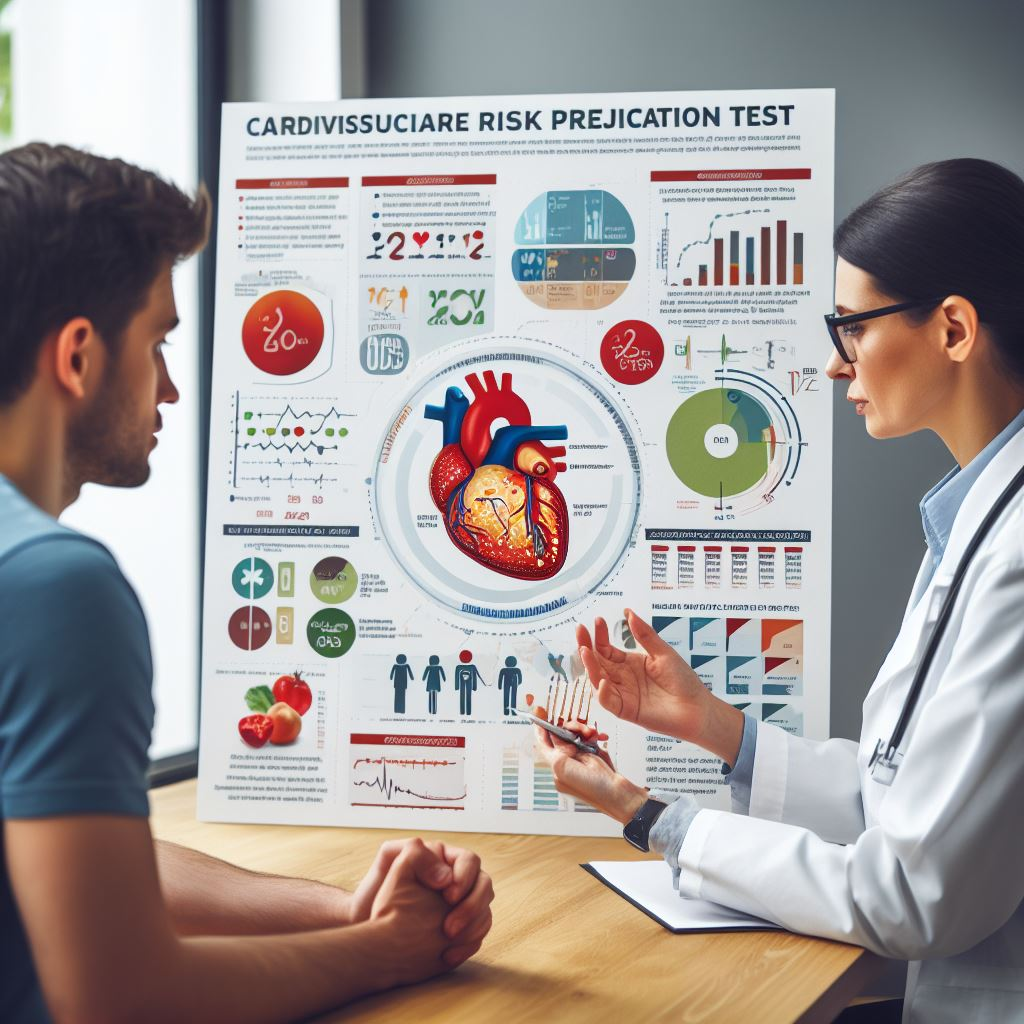



This project demonstrates the power of machine learning in forecasting the 10-year risk of CHD among individuals based on ongoing cardiovascular study data.

Key insights include:

1. **Data Preparation:** Rigorous data preprocessing significantly boosted model performance, ensuring more accurate predictions.

2. **Feature Selection:** Identifying crucial predictors optimized models, focusing on the most influential variables for CHD risk.

3. **Optimal Model Choice:** The Neural Network model, fine-tuned for performance, excelled with a remarkable recall score, efficiently identifying at-risk individuals.

4. **Handling Data Imbalance:** Techniques like SMOTE and Tomek links addressed data imbalance, enhancing model performance by ensuring balanced representation of classes.

This project demonstrates how machine learning can address real-world challenges, emphasizing the importance of meticulous data preparation. By refining data quality and model selection, accurate predictions can influence decision-making across diverse domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***




#   
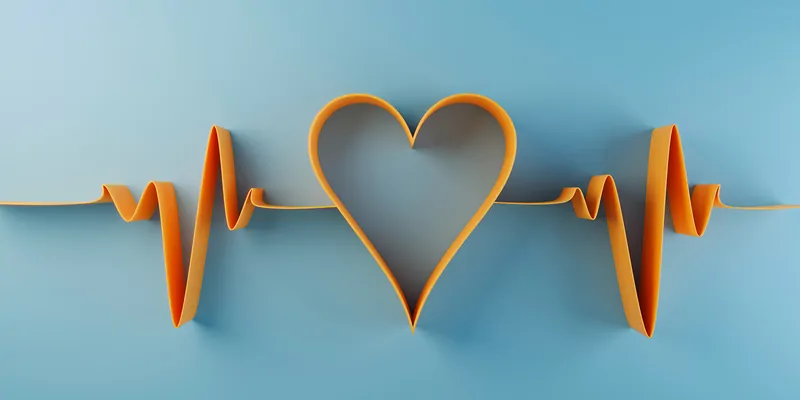